# Part II - Ford GoBike data explanation
## by Emmanuel Adeleye

## Investigation Overview


> The analysis focus on checking the relationships between diferent features in the dataset and bringing out every hidden insights in the dataset. The analysis focus more on the age, gender, time spent commutting, the stations and the user types

## Dataset Overview

> Fordgobike Trip dataset contains information about the trips made using their bikes. The dataset is generated in February, 2019 containing 183412 entries with 16 features. The dataset entails the time taken for each trip, the time the trip started and ended, the loation of the start and end stations, bike id, and brief information about the user (user type, brth year, gender).

<p>Through this analysis, there will be better understandiing of the data and hidden insights will be generated.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
bike = pd.read_csv('cleaned_ford_gobike.csv')
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_gender,bike_share_for_all_trip,start_date,start_hour,end_hour,start_day,age,age_group
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,Male,Yes,2019-02-28,0,0,Thursday,45.0,Adult
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,Male,No,2019-02-28,0,0,Thursday,60.0,Adult
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,...,3803,Subscriber,Female,No,2019-02-28,0,0,Thursday,36.0,Youth
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,6329,Subscriber,Male,No,2019-02-28,0,0,Thursday,30.0,Youth
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,...,6548,Subscriber,Other,No,2019-02-28,0,0,Thursday,31.0,Youth


### Create Plotting Functions

In [3]:
# Plot_bar function to help with plotting bars using Matplotlib
def plot_bar(x, y, labels = None, title = None, xlabel = None, ylabel=None, color =      
None):
    sns.set_style('darkgrid')
    plt.bar(x, y, tick_label = labels, color = color, width = 0.3)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)
    

# plot_barplot function to help with plotting bars using seaborn
def plot_barplot(data, x, y, title = None, xlabel = None, ylabel=None, color =      
None, order = None):
    sns.set_style('darkgrid')
    sns.barplot(data = data, x = x, y = y, color = color, ci = None, order = order)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)
    

    
# plot_count function to help with plotting countplot using Seaborn
def plot_count(data, x , title = None, xlabel = None, ylabel=None, color = None , order = None):
    sns.set_style('darkgrid')
    sns.countplot(data = data, x = x, color = color, order = order)
    plt.title(title, weight = 'bold', fontsize = 15)
    plt.xlabel(xlabel, weight = 'bold', fontsize = 12)
    plt.ylabel(ylabel, weight = 'bold', fontsize = 12)

# Which day of the week do people ride bike most?
More of the bike trips were made during the weekdays with an higher count on Thursdays. Less trips were made during the weekends suggetsing that the bikes were used for commuting to and from workplaces

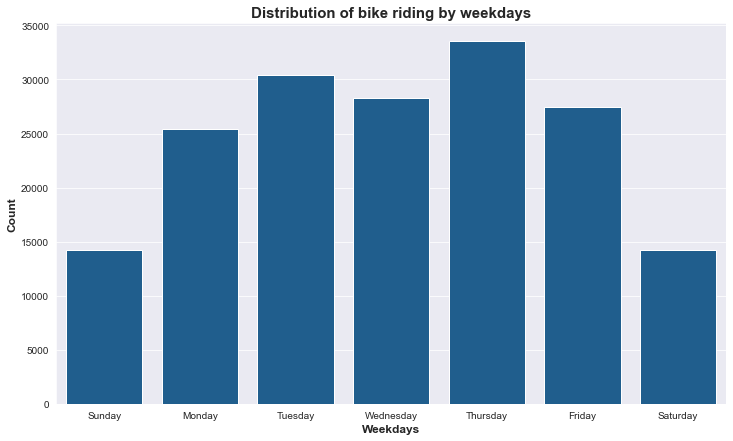

In [4]:
plt.figure(figsize = (12, 7))
plot_count(data = bike, x= 'start_day', ylabel = 'Count', xlabel = 'Weekdays',
           title = 'Distribution of bike riding by weekdays', color = '#0E609F',
           order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Start time and end time for most trips
The distribution of start time and end time is similar implying that most trips did not suppass the hour it was started.
Most of the trips were taken in the morning and evening - 9AM, 6PM, 5PM, and 8AM confirming the previous suggestion that the trips were used for commuting to and from workplaces

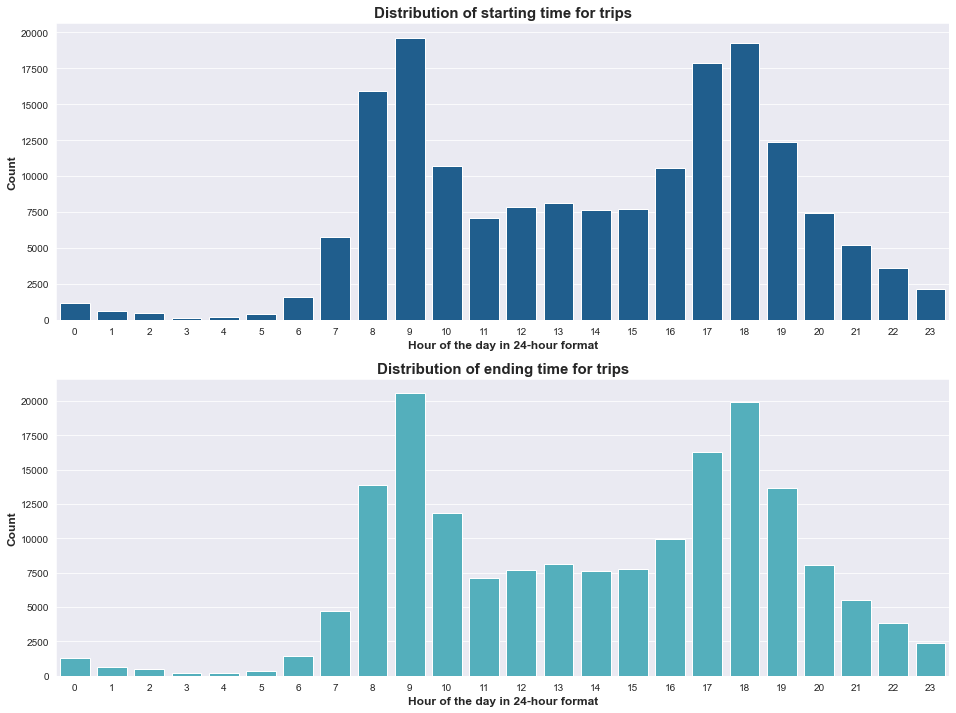

In [5]:
# creating figure and specifying dimensions 
plt.figure(figsize = (16, 12))

plt.subplot(2, 1, 1)
# calling the function plot_couunt to create a count plot for start hour
plot_count(data = bike, x = 'start_hour', xlabel = 'Hour of the day in 24-hour format', 
           ylabel = 'Count', title = 'Distribution of starting time for trips', color = '#0E609F')

plt.subplot(2, 1, 2)
# calling the function plot_couunt to create a count plot for start hour
plot_count(data = bike, x = 'end_hour', xlabel = 'Hour of the day in 24-hour format', 
           ylabel = 'Count', title = 'Distribution of ending time for trips', color = '#43BCCD')


# Top stations

* More trips were started at the station located at Market st 10th street.
* Three of the top start stations are at market street.
* Most members end their trips at San Francisco Caltrain station 2.
* The station at Market street at the 10th street seems to be more popular than other stations - it made the top start station and the second top end station.
* Most of the top stations are located at Market street suggesting a a large population and a busy area.

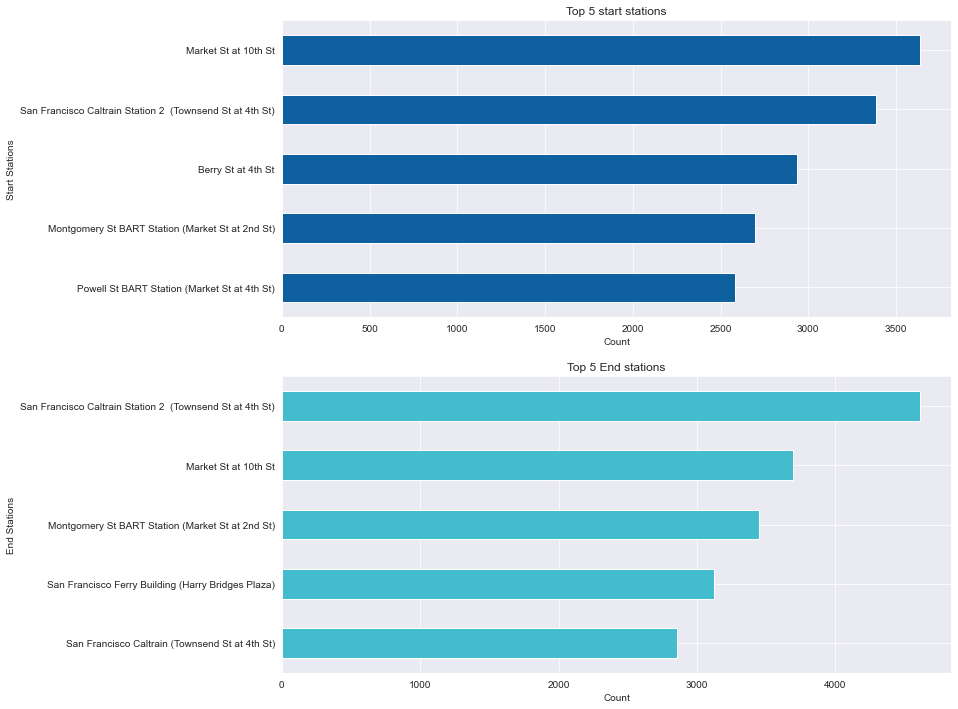

In [6]:
# creating figure and specifying dimensions
plt.figure(figsize = (12, 12))

plt.subplot(2,1,1)
# counting the end stations and plotting the top 5 stations in an horizontal bar chart
bike.start_station_name.value_counts(ascending = True)[-5:].plot(kind = 'barh', color = '#0E609F')
plt.title('Top 5 start stations')
plt.ylabel('Start Stations')
plt.xlabel('Count');

plt.subplot(2,1,2)
# counting the end stations and plotting the top 5 stations in an horizontal bar chart
bike.end_station_name.value_counts(ascending = True)[-5:].plot(kind = 'barh', color = '#43BCCD')
plt.title('Top 5 End stations')
plt.xlabel('Count')
plt.ylabel('End Stations');

# Relationship between User Type and trip duration

* Though the number of subscribers are much more than that of customers with subscribers having about 90 percentage of the population, customers take longer time on their trips.

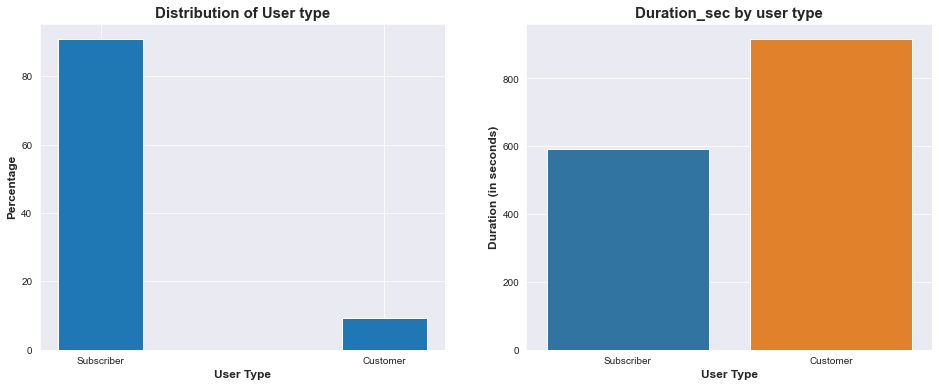

In [7]:
# creating a figure and specifying the dimensions
plt.figure(figsize = (16, 6))

plt.subplot(1,2,1)
# creating a dataframe that counts the values of the user_types and convert the values to percentages
user_df = pd.DataFrame(bike.user_type.value_counts(normalize = True)*100).reset_index().rename(columns = {'index': 'user_type', 'user_type': 'percentage'})
# calling plot_bar function for plotting bar chart
plot_bar(user_df.user_type, user_df.percentage, title = 'Distribution of User type',
         xlabel = 'User Type', ylabel = 'Percentage')


plt.subplot(1,2,2)
# plot the duration_sec for each user type in a barchart
# calling the plot_barplot function to create a bar plot using seaborn
plot_barplot(data = bike, x = 'user_type', y = 'duration_sec', title = 'Duration_sec by user type', 
            xlabel = 'User Type', ylabel = 'Duration (in seconds)')

## Relationship between age group and trip duration

Youths take shorter time for their trips compared to other age groups. This could be that youths commute at a greater speed in comparison to Adults and Elders so they seem to complete their trips in lesser time

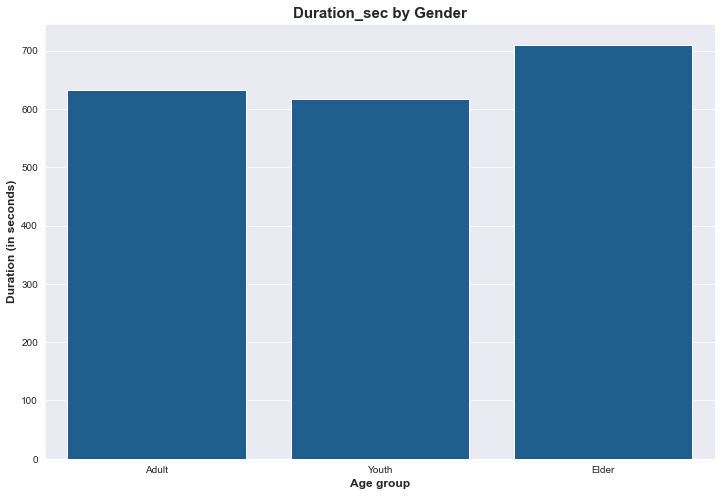

In [8]:
plt.figure(figsize = (12, 8))

# calling the plot_barplot function to create a bar plot using seaborn
plot_barplot(data = bike, x = 'age_group', y = 'duration_sec', title = 'Duration_sec by Gender', 
            xlabel = 'Age group', ylabel = 'Duration (in seconds)', color = '#0E609F')